In [1]:
# import the packages needed for the study
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import tqdm
import seaborn as sns
from numpy import nan
from numpy import isnan
from pandas import to_numeric
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
 data = pd.read_csv("household_power_consumption.txt", sep = ";", header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

data.replace('?', nan, inplace=True)
data = data.astype('float32')
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.429993,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.000000,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.820007,3.8,0.0,0.0,0.0


In [3]:
def missing(values):
	one_day = 60 * 24
	for row in range(values.shape[0]):
		for col in range(values.shape[1]):
			if isnan(values[row, col]):
				values[row, col] = values[row - one_day, col]

missing(data.values)


In [4]:
values = data.values
data['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [5]:
daily_groups = data.resample('D')
daily_data = daily_groups.sum()
monthly_groups = data.resample('M')
monthly_data = monthly_groups.sum()
# summarize
print(monthly_data.shape)
print(monthly_data.head())
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')
monthly_data.to_csv('household_power_consumption_month.csv')

(48, 8)
            Global_active_power  Global_reactive_power     Voltage  \
datetime                                                             
2006-12-31         41826.753906            2889.917969   5310733.0   
2007-01-31         69014.875000            5922.627930  10754002.0   
2007-02-28         56493.765625            4582.113770   9697749.0   
2007-03-31         58864.472656            5122.335938  10736518.0   
2007-04-30         37780.074219            5102.863770  10326369.0   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-31     176651.000000         27460.0         48783.0        163022.0   
2007-01-31     292253.593750         56433.0         79275.0        329596.0   
2007-02-28     238483.593750         47586.0         64607.0        270310.0   
2007-03-31     248781.796875         60769.0        104762.0        290378.0   
2007-04-30     162377

In [6]:
data = pd.read_csv('/home/abdulraqeeb/Notebook/stage E/household_power_consumption_days.csv',infer_datetime_format=True, index_col=['datetime'] )
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922000,93552.53,5180.8,0.0,546.0,4926.0,14680.934
2006-12-17,3390.460,226.006000,345725.30,14398.6,2033.0,4187.0,13341.0,36946.668
2006-12-18,2203.826,161.792000,347373.62,9247.2,1063.0,2621.0,14018.0,19028.434
2006-12-19,1666.194,150.942000,348479.00,7094.0,839.0,7602.0,6197.0,13131.900
2006-12-20,2225.748,160.998000,348923.62,9313.0,0.0,2648.0,14063.0,20384.800
...,...,...,...,...,...,...,...,...
2010-11-22,2041.536,142.354000,345883.84,8660.4,4855.0,2110.0,10136.0,16924.600
2010-11-23,1577.536,137.450000,346428.75,6731.2,1871.0,458.0,7611.0,16352.267
2010-11-24,1796.248,132.460000,345644.60,7559.4,1096.0,2848.0,12224.0,13769.467


In [7]:
data = data.astype('float32')
data = data.fillna(method='bfill')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 2006-12-16 to 2010-11-26
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1442 non-null   float32
 1   Global_reactive_power  1442 non-null   float32
 2   Voltage                1442 non-null   float32
 3   Global_intensity       1442 non-null   float32
 4   Sub_metering_1         1442 non-null   float32
 5   Sub_metering_2         1442 non-null   float32
 6   Sub_metering_3         1442 non-null   float32
 7   sub_metering_4         1442 non-null   float32
dtypes: float32(8)
memory usage: 56.3+ KB


In [9]:
data.describe(include = 'all')

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,1567.839111,178.004761,346600.531250,6646.587402,1609.656006,1858.135254,9280.574219,13382.286133
std,597.306824,48.881691,7375.850098,2472.108887,1581.726074,2085.161377,3674.915527,6071.784668
min,250.298004,34.922001,93552.531250,1164.000000,0.000000,0.000000,1288.000000,2313.633301
25%,1176.195007,143.063004,345736.796875,5055.399902,700.000000,432.500000,6681.000000,9400.766602
50%,1543.252991,171.198997,346979.437500,6539.300049,1119.000000,696.000000,9272.000000,12634.700195
75%,1894.467529,202.548500,348283.375000,7965.599976,2201.750000,2732.000000,11764.000000,16498.225098
max,4773.386230,417.834015,356306.406250,20200.400391,11178.000000,12109.000000,23743.000000,61736.433594


In [10]:
#data = data.astype('float32')
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data[ 'Global_active_power' ])
print(f'ADF Statistic: {adf_result[0]}')
print( f'p-value: {adf_result[1]}')
print( f'No. of lags used: {adf_result[2]}' )
print( f'No. of observations used : {adf_result[3]}')
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f'{k} : {v}' ) 

ADF Statistic: -3.69738470194987
p-value: 0.0041500913951233965
No. of lags used: 22
No. of observations used : 1419
Critical Values:
1% : -3.434966750462565
5% : -2.8635789736973725
10% : -2.5678555388041384


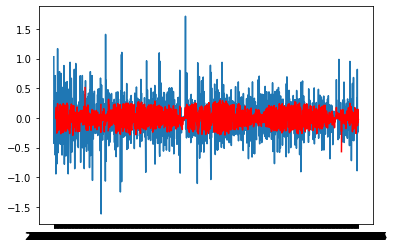

In [11]:
data_log = np.log(data)
data_diff = data_log.diff(periods= 1 )
plt.plot(data_diff.index, data_diff.Global_active_power, '-' )
plt.plot(data_diff.rolling( 12 ).mean(), color= 'red' ) 

In [12]:
data_diff.isnull().sum()

Global_active_power        1
Global_reactive_power      1
Voltage                    1
Global_intensity           1
Sub_metering_1           114
Sub_metering_2             9
Sub_metering_3             1
sub_metering_4             1
dtype: int64

In [13]:
from statsmodels.tsa.arima_model import ARIMA
#(p,d,q)
data_diff = data_diff.fillna(method='bfill')
data_diff = data_diff.replace([np.inf, -np.inf], np.nan).dropna(axis=1).values
data_diff

array([[ 1.0310268 ,  1.8674443 ,  1.3071213 ,  1.022172  ,  0.996315  ,
         0.92292595],
       [ 1.0310268 ,  1.8674443 ,  1.3071213 ,  1.022172  ,  0.996315  ,
         0.92292595],
       [-0.43077087, -0.3342495 ,  0.00475597, -0.44281006,  0.04950047,
        -0.6635418 ],
       ...,
       [ 0.12983608, -0.03697968, -0.00226593,  0.11603832,  0.47380638,
        -0.17191315],
       [-0.22721195, -0.1315875 ,  0.00625229, -0.23036575, -0.8796663 ,
         0.22702312],
       [ 0.03901482,  0.03965855, -0.13632298,  0.0417223 ,  0.67774963,
        -0.25813007]], dtype=float32)

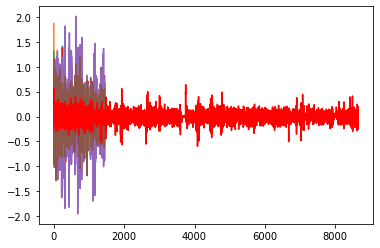

In [14]:
AR_model = ARIMA(data_diff.reshape(-1).tolist(), order=(2,0,0))
AR_model_results = AR_model.fit()
plt.plot(data_diff)
plt.plot(AR_model_results.fittedvalues, color= 'red' ) 

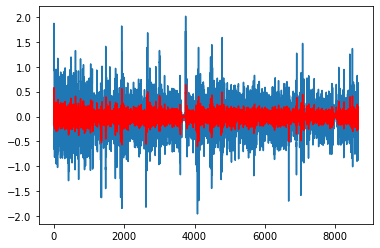

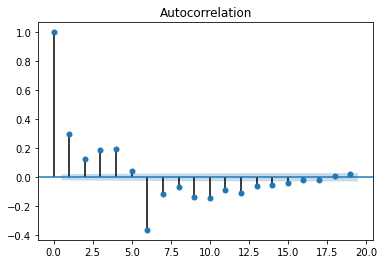

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
AR_model = ARIMA(data_diff.reshape(-1).tolist(), order=( 2 , 0 , 0 ))
AR_model_results = AR_model.fit()
plt.plot(data_diff.reshape(-1).tolist())
plt.plot(AR_model_results.fittedvalues, color= 'red' )
#ACF
plot_acf(data_diff.reshape(-1).tolist(), lags = range(0,20))
plt.show()


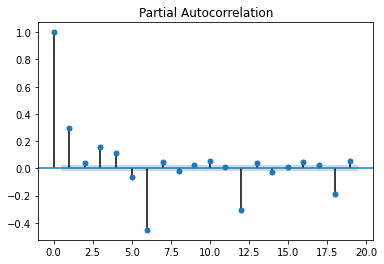

In [16]:
plot_pacf(data_diff.reshape(-1).tolist(), lags = range( 0 , 20 ))
plt.show() 

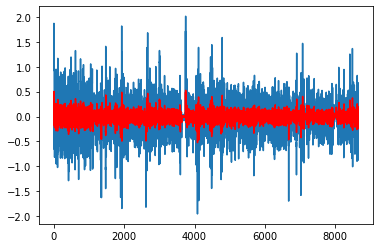

In [17]:
MA_model = ARIMA(data_diff.reshape(-1).tolist(), order=( 0 , 0 , 2 ))
MA_model_results = MA_model.fit()
plt.plot(data_diff.reshape(-1).tolist())
plt.plot(MA_model_results.fittedvalues, color= 'red' )

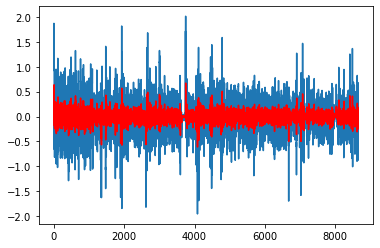

In [18]:
ARIMA_model = ARIMA(data_diff.reshape(-1).tolist(), order=( 2 , 0 , 1 )) 
ARIMA_results = ARIMA_model.fit()
plt.plot(data_diff.reshape(-1).tolist())
plt.plot(ARIMA_results.fittedvalues, color= 'red' ) 

In [73]:
from fbprophet import Prophet 
df=pd.read_csv('/home/abdulraqeeb/Notebook/stage E/household_power_consumption_days.csv', error_bad_lines = False)
df[ 'datetime' ]= pd.to_datetime(df[ 'datetime' ])
df = df.rename(columns={ "datetime" : "ds" , "Global_active_power" : "y" })
df.head() 

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.934
1,2006-12-17,3390.460,226.006,345725.30,14398.6,2033.0,4187.0,13341.0,36946.668
2,2006-12-18,2203.826,161.792,347373.62,9247.2,1063.0,2621.0,14018.0,19028.434
3,2006-12-19,1666.194,150.942,348479.00,7094.0,839.0,7602.0,6197.0,13131.900
4,2006-12-20,2225.748,160.998,348923.62,9313.0,0.0,2648.0,14063.0,20384.800


In [74]:
model = Prophet()
model.fit(df) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
future = model.make_future_dataframe(periods= 365 , freq= 'D' )
forecast = model.predict(future)
forecast.head()
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1802,2011-11-22,1599.586295,1486.556483,2558.352567,1591.228934,1607.343780,441.664458,441.664458,441.664458,-28.001046,-28.001046,-28.001046,469.665504,469.665504,469.665504,0.0,0.0,0.0,2041.250753
1803,2011-11-23,1599.644497,1558.122124,2636.419439,1591.258947,1607.441100,467.208493,467.208493,467.208493,-8.301931,-8.301931,-8.301931,475.510423,475.510423,475.510423,0.0,0.0,0.0,2066.852989
1804,2011-11-24,1599.702699,1427.109778,2479.632759,1591.280306,1607.535879,323.207226,323.207226,323.207226,-155.276352,-155.276352,-155.276352,478.483578,478.483578,478.483578,0.0,0.0,0.0,1922.909924
1805,2011-11-25,1599.760901,1477.295155,2525.343741,1591.289996,1607.620807,411.367144,411.367144,411.367144,-67.442047,-67.442047,-67.442047,478.809191,478.809191,478.809191,0.0,0.0,0.0,2011.128044
1806,2011-11-26,1599.819103,1779.790461,2835.381057,1591.299686,1607.705252,689.794256,689.794256,689.794256,213.021129,213.021129,213.021129,476.773127,476.773127,476.773127,0.0,0.0,0.0,2289.613359


In [76]:
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2344.796768,1867.877924,2866.062410,1646.813547,1646.813547,1646.813547
1,2006-12-17,2324.406151,1790.763227,2827.375392,1646.632772,1646.632772,1646.632772
2,2006-12-18,2029.911359,1484.926403,2573.542635,1646.451997,1646.451997,1646.451997
3,2006-12-19,2148.566829,1621.006686,2697.862819,1646.271222,1646.271222,1646.271222
4,2006-12-20,2182.565772,1671.719777,2703.721532,1646.090448,1646.090448,1646.090448
...,...,...,...,...,...,...,...
1802,2011-11-22,2041.250753,1486.556483,2558.352567,1599.586295,1591.228934,1607.343780
1803,2011-11-23,2066.852989,1558.122124,2636.419439,1599.644497,1591.258947,1607.441100
1804,2011-11-24,1922.909924,1427.109778,2479.632759,1599.702699,1591.280306,1607.535879
1805,2011-11-25,2011.128044,1477.295155,2525.343741,1599.760901,1591.289996,1607.620807


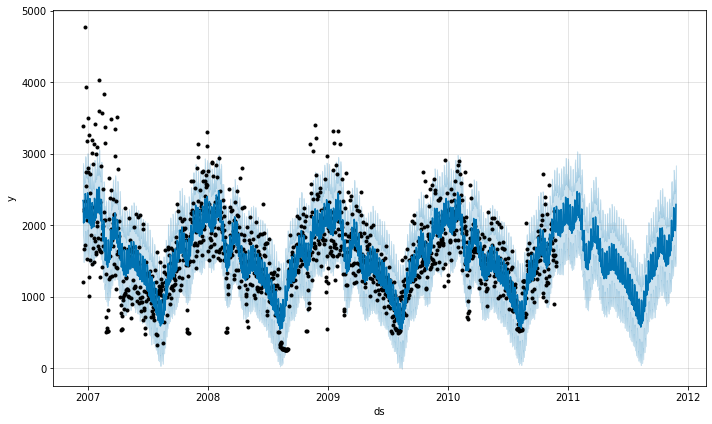

In [77]:
model.plot(forecast)
plt.show() 

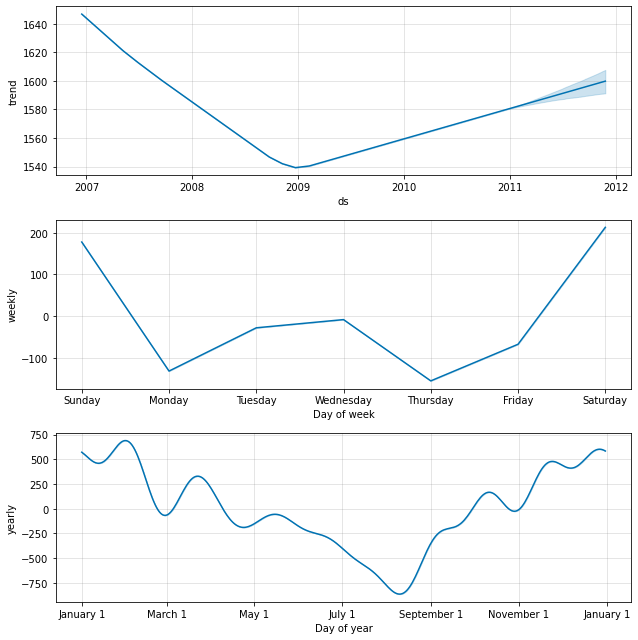

In [78]:
model.plot_components(forecast)
plt.show()

In [83]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
cross_validation_results = cross_validation(model, initial='396 days', period='15 days', horizon='70 days')
print(cross_validation_results)

INFO:fbprophet:Making 66 forecasts with cutoffs between 2008-01-16 00:00:00 and 2010-09-17 00:00:00

100%|██████████| 66/66 [02:05<00:00,  1.90s/it]             ds         yhat   yhat_lower   yhat_upper         y     cutoff
0    2008-01-17  1836.587077  1183.742689  2490.155983  1572.282 2008-01-16
1    2008-01-18  1906.532824  1264.101474  2499.760616  2186.988 2008-01-16
2    2008-01-19  2245.098323  1619.024702  2878.015295  1980.306 2008-01-16
3    2008-01-20  2383.352691  1724.787473  3006.030784  1740.368 2008-01-16
4    2008-01-21  1895.321203  1252.660182  2573.502205  1858.998 2008-01-16
...         ...          ...          ...          ...       ...        ...
4615 2010-11-22  2012.122274  1481.514051  2579.079713  2041.536 2010-09-17
4616 2010-11-23  2138.045302  1568.377217  2688.380812  1577.536 2010-09-17
4617 2010-11-24  2155.450721  1638.342157  2746.350628  1796.248 2010-09-17
4618 2010-11-25  1996.351098  1465.158903  2554.180180  1431.164 2010-09-17
4619 2010-11-26 

In [84]:
performance_metrics_results = performance_metrics(cross_validation_results)
print(performance_metrics_results)

   horizon            mse        rmse         mae      mape     mdape  \
0   7 days  157071.842610  396.322902  302.920724  0.255765  0.159241   
1   8 days  165325.761566  406.602707  308.123557  0.259362  0.166727   
2   9 days  163964.242628  404.924984  305.130593  0.257671  0.163430   
3  10 days  159276.896486  399.095097  303.606753  0.260160  0.160890   
4  11 days  162602.808693  403.240386  309.895948  0.272631  0.166578   
..     ...            ...         ...         ...       ...       ...   
59 66 days  183532.009812  428.406361  324.260730  0.295586  0.164742   
60 67 days  180728.176961  425.121367  321.283906  0.281731  0.164843   
61 68 days  182822.213235  427.577143  321.665030  0.279393  0.166841   
62 69 days  175426.258914  418.839180  311.519309  0.268748  0.152583   
63 70 days  165822.507447  407.213098  307.074624  0.266973  0.156136   

    coverage  
0   0.852814  
1   0.850649  
2   0.861472  
3   0.867965  
4   0.865801  
..       ...  
59  0.835498  
60 